In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [5]:
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
import torch

In [6]:
is_df = pd.read_csv("/Users/apple/Desktop/ground-news-analysis/israeli-palestinian-conflict_articles.csv")


In [ ]:
is_df = is_df.drop_duplicates(subset='url')
# Ensure 'article_text' is a string and remove rows with NaN.
is_df['article_text'] = is_df['article_text'].astype(str)
is_df.dropna(subset=['article_text'], inplace=True)
# Filter out articles with fewer than 512 characters.
is_df = is_df[is_df['article_text'].str.len() >= 512].copy()

In [ ]:
is_df.shape

(95224, 25)

In [1]:
import os

json_dir = '/Users/apple/Desktop/ground-news-analysis/Article-Bias-Prediction/data/jsons'

if os.path.exists(json_dir) and os.path.isdir(json_dir):
    print("Directory exists and is accessible.")
    print("Files in directory:", os.listdir(json_dir))
else:
    print("Directory does not exist or is not accessible.")

Directory exists and is accessible.
Files in directory: ['bpp2Cqpvyi2ER5Lr.json', 'PnVV1v7F0D8bhd5X.json', 'pZlutCuZNm832qqK.json', 'aMGkvFlpLyQrX6iu.json', 'Ludq48gCzDiKtnmX.json', 'VCAqVCCkTWioWWLE.json', '7QcjilFOQGEhuaEP.json', 'JzHvoMfYCFcIVboO.json', 'fTISZrMaZG2aEQgA.json', 'PAN7i5rlb0Z6tF1U.json', 'zt0WI952L6fp3Q9f.json', 'zuynbXnKEZgc3wKH.json', 'jvvnzO8QAZHZC7sh.json', '9Bhj0JnDG8kwZVls.json', 'azpNrensPe4f9cyQ.json', 'nRVhRQrlqN4s7S5E.json', 'c3vIk0qs0RZJeVxZ.json', 'SUFgzIyyoyxOE2zn.json', 'fPrMX9N0tQ7PwU1h.json', 'xUYb6nZnCIJCrdGy.json', 'g4DOMamtoHgrf17l.json', 'eJU1UR8yDnZ8ACK8.json', 'v1FoROR1ESlXkCWx.json', 'sg1SCwPWtclz8Yty.json', 'tD0g8Bo8SMyeiIgL.json', 'fC1mVJQ97PY1kTt9.json', 'bDuQU3qRfhmhbbgk.json', 'v14iGLgd97jgUAHe.json', 'ELItuvrRuGYyCN9w.json', 'XNNqkeF7Viv2F7YV.json', '8H1RXuPk0gE25oY1.json', 'BP1sLDE8l2w3yvRx.json', 'Rn9ueGHzDcBSW0Fs.json', 'OZ28SqBkz2Xzta2B.json', '8Y31Q5rCys9Zv8PO.json', 'rY7Ll4HYFwe5J3RD.json', 'oQEGCiSF7z3xgWfO.json', 'j4BZs4t2agyHiqDL.

In [2]:
import os
import json

# Define the directory
json_dir = '/Users/apple/Desktop/ground-news-analysis/Article-Bias-Prediction/data/jsons'

# List all JSON files in the directory
json_files = [f for f in os.listdir(json_dir) if f.endswith('.json')]

# Initialize an empty list to store JSON data
data_list = []

# Read each JSON file
for file in json_files:
    file_path = os.path.join(json_dir, file)
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            data_list.append(data)  # Append JSON data to the list
    except json.JSONDecodeError:
        print(f"Error: {file} contains invalid JSON!")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Print the loaded JSON data
print("Successfully loaded JSON files:", len(data_list))

Successfully loaded JSON files: 37554


In [3]:
data_list[0] 

{'topic': 'politics',
 'source': 'Politico',
 'bias': 0,
 'url': 'https://www.politico.com/news/magazine/2019/11/13/trump-impeachment-hearing-change-mind-congress-070145',
 'title': 'Can the Impeachment Hearings Actually Change Anyone’s Mind?',
 'date': '2019-11-13',
 'authors': '',
 'content': 'This happens for different reasons , but a key element is the vicious cycle between holding strong attitudes on an issue and something called “ selective perception. ” Essentially , the stronger your views are on an issue like Trump ’ s impeachment , the more likely you are to attend more carefully to information that supports your views and to ignore or disregard information that contradicts them . Consuming more belief-consistent information will , in turn , increase your original support or disapproval for impeachment , which just fortifies your attitudes . So , no , not much change will be seen in the minds of the 33 percent .\nExcept , maybe . One of the more interesting findings from rese

In [4]:
import pandas as pd
# Convert to DataFrame
df = pd.DataFrame(data_list)

# Display the DataFrame
df.head()

,topic,source,bias,url,title,date,authors,content,content_original,source_url,bias_text,ID
0,politics,Politico,0,https://www.politico.com/news/magazine/2019/11...,Can the Impeachment Hearings Actually Change A...,2019-11-13,,"This happens for different reasons , but a key...","This happens for different reasons, but a key ...",www.politico.com,left,bpp2Cqpvyi2ER5Lr
1,china,Bloomberg,1,https://www.bloomberg.com/news/articles/2018-0...,Trump’s Tariff Barrage Pushes China Fight to P...,2018-07-11,"Brendan Scott, Enda Curran",LISTEN TO ARTICLE 5:37 SHARE THIS ARTICLE Shar...,LISTEN TO ARTICLE 5:37 SHARE THIS ARTICLE Shar...,www.bloomberg.com,center,PnVV1v7F0D8bhd5X
2,terrorism,Washington Times,2,http://www.washingtontimes.com/news/2014/sep/1...,Top general: Failed Foley rescue was ‘highest-...,2014-09-16,Stephen Dinan,The Pentagon ’ s top general said Tuesday that...,The Pentagon’s top general said Tuesday that t...,www.washingtontimes.com,right,pZlutCuZNm832qqK
3,politics,Salon,0,http://www.salon.com/2014/11/12/americas_post_...,America’s post-midterm inferno: Tea Party garb...,2014-11-12,Robert Hennelly,A full week after the alleged “ shellacking “ ...,A full week after the alleged “shellacking “ o...,www.salon.com,left,aMGkvFlpLyQrX6iu
4,politics,CNN (Web News),0,http://www.cnn.com/2014/01/08/politics/christi...,E-mails among Christie appointees suggest poli...,2014-01-08,Catherine E. Shoichet,Story highlights Gergen : `` It feeds into thi...,"Story highlights Gergen: ""It feeds into this n...",www.cnn.com,left,Ludq48gCzDiKtnmX


In [5]:
#check missing values in the dataset
df.isnull().sum()

topic               0
source              0
bias                0
url                 0
title               0
date                0
authors             0
content             0
content_original    0
source_url          0
bias_text           0
ID                  0
dtype: int64

In [18]:
from transformers import AutoTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from tqdm import tqdm

def tokenize_and_tfidf(df, text_column='content', model_name="bert-base-uncased"):
    """
    Tokenizes text using a Transformer tokenizer and applies TF-IDF vectorization.

    Parameters:
    - df (pd.DataFrame): DataFrame containing a column with text data.
    - text_column (str): Column name that contains raw text.
    - model_name (str): Hugging Face model to use for tokenization.

    Returns:
    - tfidf_matrix (sparse matrix): TF-IDF transformed matrix of tokenized text.
    - feature_names (list): List of TF-IDF feature names (tokens).
    """
    
    # Load tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Enable progress bar
    tqdm.pandas()

    # Tokenize text
    df['tokenized_text'] = df[text_column].progress_apply(
        lambda x: " ".join(tokenizer.convert_ids_to_tokens(tokenizer(x, truncation=True, padding=True)['input_ids']))
    )

    # Apply TF-IDF
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(df['tokenized_text'])

    return tfidf_matrix, tfidf.get_feature_names_out()

In [20]:
# Run Tokenization and TF-IDF
tfidf_matrix, feature_names = tokenize_and_tfidf(df, text_column='content')

# Check the shape of the matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

# Display sample feature names (tokens)
print("Sample Tokens:", feature_names[:10])

100%|██████████| 37554/37554 [02:12<00:00, 284.23it/s]


TF-IDF Matrix Shape: (37554, 24493)
Sample Tokens: ['00' '000' '001' '00pm' '01' '02' '03' '04' '05' '050']


In [24]:
#convert the matrix to a pandas DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df.head()

,00,000,001,00pm,01,02,03,04,05,050,...,zzi,zziness,zzle,zzled,zzling,zzo,zzy,ław,на,ов
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.091331,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df['bias_text'] contains labels ('left', 'right', 'center')
labels = df['bias_text']

# Convert categorical labels to numerical (0 = left, 1 = center, 2 = right)
label_mapping = {'left': 0, 'center': 1, 'right': 2}
y = labels.map(label_mapping)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)



print(f"Training Samples: {X_train.shape}, Testing Samples: {X_test.shape}")

Training Samples: (30043, 24493), Testing Samples: (7511, 24493)


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Convert TF-IDF matrix to array
X = tfidf_matrix.toarray()  # Convert sparse matrix to dense
y = df['bias_text'].map({'left': 0, 'center': 1, 'right': 2})  # Encode labels numerically

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=300, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on test set
y_pred = rf_clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['left', 'center', 'right'])

print("Random Forest Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

KeyboardInterrupt: 

In [29]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30],        # Depth of trees
    'min_samples_split': [2, 5, 10]   # Minimum samples per split
}

# Run GridSearch
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train final model with best params
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Evaluate tuned model
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, target_names=label_mapping.keys()))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   5.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   5.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   5.0s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   6.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   9.7s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   4.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   9.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   4.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  11.7s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   9.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=  17.3s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   5.8s
[CV] END max_depth=10, min_

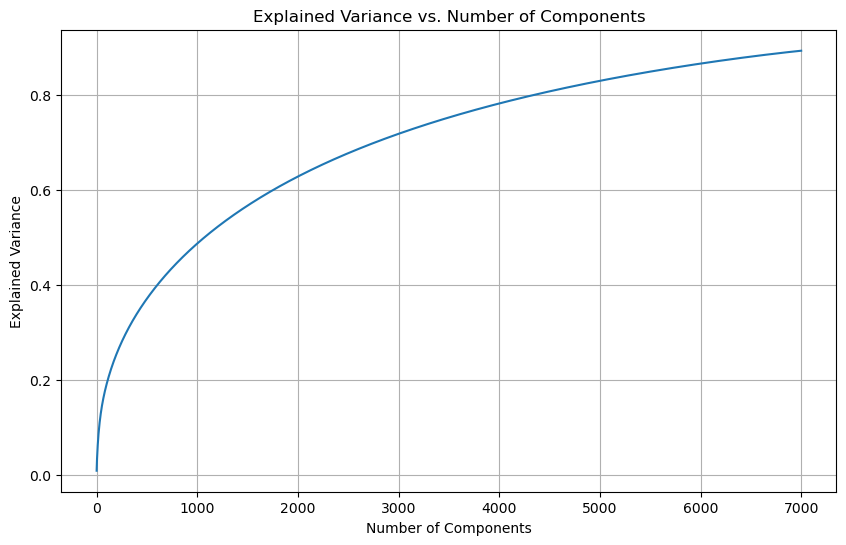

In [36]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Initialize PCA with 2 components
pca = PCA(n_components=6999)
X_pca = pca.fit_transform(X)    # Fit and transform the data


# Plot explained variance to find the best n_components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()


In [37]:
# Apply PCA with optimal components
pca = PCA(n_components=5000)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [38]:
#save pca results
np.save('X_train_pca.npy', X_train_pca)
np.save('X_test_pca.npy', X_test_pca)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest on PCA-reduced features
rf_clf_pca = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf_clf_pca.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_pca = rf_clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
classification_report_pca = classification_report(y_test, y_pred_pca, target_names=['left', 'center', 'right'])

print("Random Forest Accuracy after PCA:", accuracy_pca)
print("Classification Report:\n", classification_report_pca)

Random Forest Accuracy after PCA: 0.4642524297696711
Classification Report:
               precision    recall  f1-score   support

        left       0.47      0.47      0.47      2629
      center       0.59      0.13      0.21      2103
       right       0.45      0.71      0.55      2779

    accuracy                           0.46      7511
   macro avg       0.50      0.44      0.41      7511
weighted avg       0.50      0.46      0.43      7511

